In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from empiricaldist import Pmf

<h2> Exercise #1 </h2>

 Suppose you are giving a talk in a large lecture hall and the fire marshal interrupts because they think the audience exceeds 1200 people, which is the safe capacity of the room.
You think there are fewer then 1200 people, and you offer to prove it. It would take too long to count, so you try an experiment:

<ul>You ask how many people were born on May 11 and two people raise their hands.</ul>
<ul>You ask how many were born on May 23 and 1 person raises their hand.
</ul>
<ul>Finally, you ask how many were born on August 1, and no one raises their hand.</ul>

How many people are in the audience? What is the probability that there are more than 1200 people.

In [11]:
hypos = np.arange(1, 2000, 10)
prior = Pmf(1, hypos)
prior.normalize() #to make it as probability

In [12]:
from scipy.stats import binom

#binom.pmf(k,n,p) arguments
#n=trials, p=probability, k=case

likelihood1 = binom.pmf(2, hypos, 1/365) #2 ppl raised 
likelihood2 = binom.pmf(1, hypos, 1/365) #1 raised
likelihood3 = binom.pmf(0, hypos, 1/365) #0 raised

In [13]:
posterior = prior * likelihood1 * likelihood2 * likelihood3
posterior.normalize()

1.3517599600903154

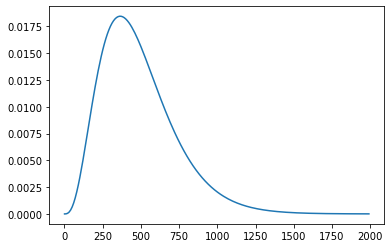

In [14]:
plt.plot(posterior)
plt.show()

<h2>Exercise #2 (alias: Rabbit in my Garden problem)</h2>

How many rabbits visit my garden?

To answer this question, we have to think about the prior distribution and the likelihood of the data:

<ul>I have sometimes seen four rabbits at the same time, so I know there are at least that many. I would be surprised if there were more than 10. So, at least as a starting place, I think a uniform prior from 4 to 10 is reasonable.</ul>
<ul>To keep things simple, let’s assume that all rabbits who visit my garden are equally likely to be caught by the camera trap in a given day. Let’s also assume it is guaranteed that the camera trap gets a picture every day.</ul>

In [15]:
#Thank God its Uniform Prior
hypos2 = np.arange(4, 11, 1)
prior = Pmf(1, hypos2)
prior

,probs
4,1
5,1
6,1
7,1
8,1
9,1
10,1


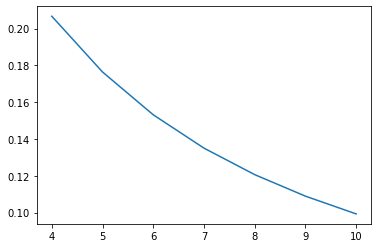

In [18]:
# likelihood를 hypos2라고 하니 그래프가 이상함 likelihood 수정이 필요할 듯..
# 카메라에 잡힌 토끼의 마리 수가 순수한 토끼의 마리 수가 아님을 고려해야함
# 4마리가 잡혔다고 하자. 같은 토끼일 경우 L=1/hypos; 다른 토끼일 경우 L=hypos-1/hypos
rabbit_likelihood = (hypos2 - 1) / pow(hypos2, 2)
rabbit_posterior = prior * rabbit_likelihood
# rabbit_posterior
rabbit_posterior.normalize()
# rabbit_posterior

plt.plot(rabbit_posterior)
plt.show()

<h2>Exercise #3 avg(Sentence)</h2>

Suppose that in the criminal justice system, all prison sentences are either 1, 2, or 3 years, with an equal number of each. One day, you visit a prison and choose a prisoner at random. What is the probability that they are serving a 3-year sentence? What is the average remaining sentence of the prisoners you observe?

In [19]:
# 3년형을 선고받은 사람을 내가 랜덤으로 뽑을 확률은? -> 각 형별로 동일한 사람의 수를 가정. 이 문제 역시 total 사람의 수를 모른다

hypos3 = np.arange(1,4,1)
prior3 = Pmf(1/3, hypos3)
prior3

,probs
1,0.333333
2,0.333333
3,0.333333


In [27]:
likelihood_prisoner = hypos3
posterior_p = prior3 * likelihood_prisoner

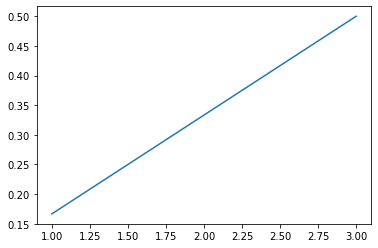

In [29]:
posterior_p.normalize()
plt.plot(posterior_p)
plt.show()

# 50%의 확률로 3년형 선고받은 사람을 만날 수 있다는 것...이거 매우 신기하군

<h2> Exercise #5 Doomsday argument</h2>
=> future number of human species👩🏻‍🚀

Suppose there are only two kinds of intelligent civilizations that can happen in the universe. The “short-lived” kind go exinct after only 200 billion individuals are born. The “long-lived” kind survive until 2,000 billion individuals are born. And suppose that the two kinds of civilization are equally likely. Which kind of civilization do you think we live in? 

Info given: the total number of people who have ever lived is about 108 billion.
 If 𝑁 is the total number who will ever live and we consider you to be a randomly-chosen person, it is equally likely that you could have been person 1, or 𝑁, or any number in between. So what is the probability that you would be number 108 billion?

Given this data and dubious prior, what is the probability that our civilization will be short-lived?

In [33]:
# 우리는 둘 중 어디에 살고 있을까요 ~?
# 단명: 200, 장수: 2000 (billion)
hypos = [200,2000]
prior = Pmf(1, hypos)
prior

,probs
200,1
2000,1


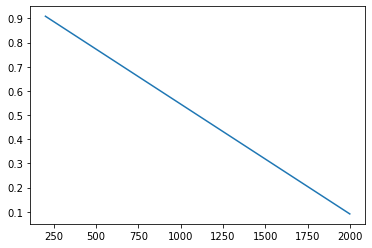

In [46]:
hypo_to_num = np.array(hypos) #error thrown b/c of list object and integer(to plot): type confliction
likelihood = 1/hypo_to_num
posterior = prior * likelihood
posterior.normalize()
posterior
plt.plot(posterior)
plt.show()